# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.24**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.34**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.24) / 0.1)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [10]:
# Буду работать локально, поэтому сначала скачаю датасет
import requests
from urllib.parse import urlencode

def download_file(public_key, filename):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode({'public_key': public_key})
    
    # Get the download link
    response = requests.get(final_url)
    if response.status_code == 200:
        download_url = response.json().get('href')
        
        # Download the file
        download_response = requests.get(download_url)
        if download_response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(download_response.content)
            print(f"Downloaded {filename}")

train_public_key = 'https://disk.yandex.ru/d/elNF0DS94o2GVA'

download_file(train_public_key, 'dataset.zip')

Downloaded dataset.zip


In [ ]:
# !sudo apt-get install -y p7zip-full

In [10]:
# на большинство классов точно больше 100 картинок (у некоторых тысячи)
# !7z x dataset.zip -y

In [1]:
# !7z x dataset/train.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,6 CPUs Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz (906EA),ASM,AES-NI)

Scanning the drive for archives:
1 file, 1012110531 bytes (966 MiB)

Extracting archive: dataset/train.zip
--
Path = dataset/train.zip
Type = zip
Physical Size = 1012110531

Everything is Ok

Folders: 100
Files: 45607
Size:       1020600728
Compressed: 1012110531

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,6 CPUs Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz (906EA),ASM,AES-NI)

Scanning the drive for archives:

ERROR: No more files
dataset/test.zip



System ERROR:
Unknown error -2147024872


In [2]:
# !7z x dataset/val.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,6 CPUs Intel(R) Core(TM) i7-8700K CPU @ 3.70GHz (906EA),ASM,AES-NI)

Scanning the drive for archives:
1 file, 54915547 bytes (53 MiB)

Extracting archive: dataset/val.zip
--
Path = dataset/val.zip
Type = zip
Physical Size = 54915547

Everything is Ok

Folders: 100
Files: 2500
Size:       55336105
Compressed: 54915547


In [ ]:
# !pip install wandb
# !pip3 install pytorch_lightning torchmetrics
# !pip install timm

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [1]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Currently logged in as: vldmrl (vldmrl-org). Use `wandb login --relogin` to force relogin


True

In [2]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import cv2
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from lightning.pytorch import seed_everything
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader,Subset
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchvision.transforms import v2

# You may add any imports you need

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    seed_everything(seed)

seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [0]:
# Посчитаю среднее и диспервию для датасета
# train_dataset = ImageFolder('train', transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]))
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset))
# img, _ = next(iter(train_dataloader))
# print(img.mean([0, 2, 3]).tolist())
# print(img.std([0, 2, 3]).tolist())

#  Стоило посчитать по части датасета, так как вычисления заняли 16 минут
# но уже посчитал, так что оставлю)
# [0.48190343379974365, 0.4437110126018524, 0.42628011107444763]
# [0.3868028223514557, 0.37239113450050354, 0.3708276152610779]

In [33]:
# Буду использовать стандартную аугментацию из torchvision
# использую v2 по примеру отсюда - https://pytorch.org/vision/main/transforms.html


train_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
        v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
        v2.RandomApply([v2.RandomEqualize()], p=0.25),
        v2.RandomPerspective(distortion_scale=0.2, p=0.25),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
                     std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
    ]
)
val_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
                     std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
    ]
)

#train_subset_indices = get_first_n_per_class(ImageFolder('train'), n=200)
#train_dataset = Subset(ImageFolder('train', transform=train_transform), train_subset_indices)

BATCH_SIZE = 64

train_dataset = ImageFolder('train', transform=train_transform)
val_dataset = ImageFolder('val', transform=val_transform)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                              num_workers=6, persistent_workers=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, num_workers=6, persistent_workers=True)

In [5]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


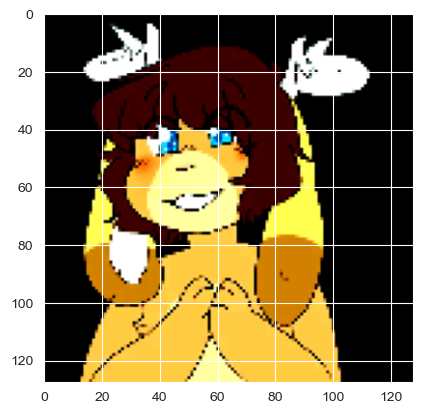

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


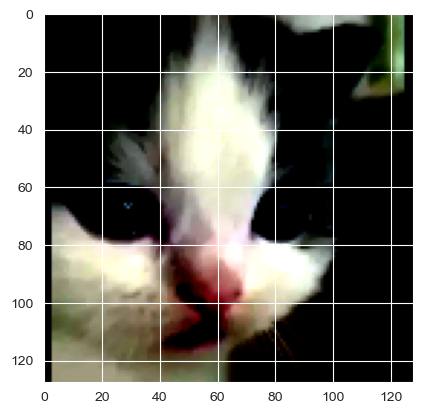

In [6]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [7]:
from torchvision.models import densenet169 
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = densenet169(weights=None)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor().to(device)
        self.preds = torch.Tensor().to(device)

        # Сделаю промежуточный слой на полтора входных слоя (1500), чтобы найти более сложные паттерны
        # И сделаю выход на 100 слоёв. Также добавлю дропауты, и заменю функцию активации
        in_features = self.model.classifier.in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=in_features,
                      out_features=1500, bias=True),
            nn.BatchNorm1d(1500, eps=0.001, momentum=0.1, affine=True),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=1500,
                      out_features=100, bias=True),
        )

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)  #.squeeze()

    def forward(self, images, target=None):
        images = images.to(device)
        output = self._forward(images)
        loss = None
        if target is not None:
            target = target.to(device)
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target), 0).to(device)
            pred = torch.argmax(output, dim=-1).to(device)
            self.preds = torch.cat((self.preds, pred), 0).to(device)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [8]:
from timm.scheduler import StepLRScheduler


class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate, loss):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss = loss

    def forward(self, x):
        result = self.model(x)  #.squeeze()
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        # добавлю scheduler https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
        #scheduler = StepLRScheduler(optimizer=optimizer, decay_t=5)
        #return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]
        return optimizer

    #def lr_scheduler_step(self, scheduler, metric):
    #    scheduler.step(epoch=self.current_epoch)

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        predictions = self(images)
        loss = self.loss(predictions, target)  #.squeeze())
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        predictions = self(images)
        # loss
        loss = self.loss(predictions, target)  #.squeeze())
        # accuracy with softmax
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), target.long(), task="multiclass", num_classes=100)
        # log
        self.log("val_loss", loss, prog_bar=True, logger=True)
        self.log("accuracy", acc, prog_bar=True, logger=True)
        return loss

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
wandb_logger = WandbLogger(
    log_model='all')

In [11]:
seed_everything(123456)

model = YourNet().to(device)
module = YourModule(model, 0.0005, nn.CrossEntropyLoss())

In [12]:
run = wandb.init(project="hw2")

In [16]:
EPOCHS = 120

In [17]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="best_weight", save_top_k=2, monitor="accuracy",mode="max")

In [18]:
seed_everything(123456)


trainer = pl.Trainer(logger=wandb_logger,
                     max_epochs=EPOCHS,
                     accelerator=device, 
                     callbacks=[checkpoint_callback],
                     deterministic=True)
trainer.fit(module, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Programs\anaconda\envs\dl\Lib\site-packages\pytorch_lightning\loggers\wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
C:\Programs\anaconda\envs\dl\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory D:\HSE\Minor IDA\deep-learning\hw2_2024\best_weight exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | YourNet          | 15.1 M | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
15.1 M    Trainable params
0         Non-trainable params
15.1 M    Total params
60.540    Total estimated model params size 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=120` reached.


### Валидация результатов задания

In [34]:
checkpoint_path = "best_weight/epoch=115-step=82708.ckpt"

validation = trainer.validate(module, val_dataloader, ckpt_path=checkpoint_path)

Restoring states from the checkpoint path at best_weight/epoch=115-step=82708.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at best_weight/epoch=115-step=82708.ckpt


Validation: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        accuracy            0.26319998502731323
        val_loss             6.351996898651123
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [35]:
acc = validation[0]["accuracy"]

In [36]:
print(f"accuracy = {acc}")
print(f"Оценка за это задание составит {np.clip(5 * acc / 0.24, 0, 5):.2f} баллов :)")

accuracy = 0.26319998502731323
Оценка за это задание составит 5.00 баллов :)


In [ ]:
wandb.finish()

## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [19]:
# Возьму ViT_B_16_Weights
from torchvision.models import vit_b_16, ViT_B_16_Weights

In [20]:
trained_model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
trained_model.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [23]:
# Теперь по гайду отсюда - https://medium.com/@pwrxndr/pytorch-transfer-learning-how-to-choose-the-right-model-ed4ad94c8b02
# Я заморожу все слои модели, а последний, классификатор, заменю и обучу
for param in trained_model.parameters():
    param.requires_grad = False

In [24]:
trained_model.heads = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=768,
              out_features=2048, bias=True),
    nn.BatchNorm1d(2048, eps=0.001, momentum=0.1, affine=True),
    nn.SiLU(inplace=True),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=2048,
              out_features=1024, bias=True),
    nn.BatchNorm1d(1024, eps=0.001, momentum=0.1, affine=True),
    nn.SiLU(inplace=True),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1024,
              out_features=100, bias=True),
)

In [ ]:
#!pip install torchinfo

In [25]:
from torchinfo import summary

summary(model=trained_model,
        input_size=(1, 3, 224, 224),  #[batch_size, color_channels, height, width]
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

C:\Programs\anaconda\envs\dl\Lib\site-packages\torch\nn\modules\activation.py:1230: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  return torch._native_multi_head_attention(


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 100]             768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

In [39]:
# Буду использовать стандартную аугментацию из torchvision
# использую v2 по примеру отсюда - https://pytorch.org/vision/main/transforms.html

from torchvision.transforms import v2

train_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.Resize((224, 224)),
        v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
        v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
        v2.RandomApply([v2.RandomEqualize()], p=0.25),
        v2.RandomPerspective(distortion_scale=0.2, p=0.25),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
                     std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
    ]
)
val_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.Resize((224, 224)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
                     std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
    ]
)
train_dataset = ImageFolder('train', transform=train_transform)
val_dataset = ImageFolder('val', transform=val_transform)

BATCH_SIZE = 64

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                              num_workers=6, persistent_workers=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, num_workers=6, persistent_workers=True)

### Тренировочный класс lightning

In [27]:
from timm.scheduler import StepLRScheduler


class MyModule(pl.LightningModule):
    def __init__(self, m, learning_rate, loss):
        super().__init__()
        self.model = m
        self.learning_rate = learning_rate
        self.loss = loss

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        # добавлю scheduler https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
        scheduler = StepLRScheduler(optimizer=optimizer, decay_t=1)  # lr будет уменьшаться каждые 20 эпох
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]

    def lr_scheduler_step(self, scheduler, metric):
        scheduler.step(epoch=self.current_epoch)

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        predictions = self.forward(images)
        loss = self.loss(predictions, target)  #.squeeze())
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        predictions = self.forward(images)
        # loss
        loss = self.loss(predictions, target)  #.squeeze())
        # accuracy with softmax
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        # log
        self.log("val_loss", loss, prog_bar=True, logger=True)
        self.log("accuracy", acc, prog_bar=True, logger=True)
        return loss

In [28]:
seed_everything(123456)
module2 = MyModule(trained_model, 0.001, nn.CrossEntropyLoss()) 

In [29]:
EPOCHS = 35

In [ ]:
run3 = wandb.init(project="hw2")

In [ ]:
wandb_logger = WandbLogger(
    log_model='all')

In [30]:
checkpoint_callback_trainable = pl.callbacks.ModelCheckpoint(dirpath="best_weight_trainable", 
                                                             save_top_k=2, 
                                                             monitor="accuracy",
                                                             mode="max")

In [31]:
seed_everything(123456)
trainer = pl.Trainer(logger=wandb_logger, 
                     max_epochs=EPOCHS, 
                     accelerator=device, 
                     callbacks=[checkpoint_callback_trainable],
                     deterministic=True
)
trainer.fit(module2, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Programs\anaconda\envs\dl\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory D:\HSE\Minor IDA\deep-learning\hw2_2024\best_weight_trainable exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | VisionTransformer | 89.6 M | train
1 | loss  | CrossEntropyLoss  | 0      | train
----------------------------------------------------
3.8 M     Trainable params
85.8 M    Non-trainable params
89.6 M    Total params
358.322   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

C:\Programs\anaconda\envs\dl\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


Уже давно выбил нормальное аккураси, остановлю пораньше

### Валидация результатов задания

In [40]:
checkpoint_path = "best_weight_trainable/epoch=29-step=21390.ckpt"

validation = trainer.validate(module2, val_dataloader, ckpt_path=checkpoint_path)

Restoring states from the checkpoint path at best_weight_trainable/epoch=29-step=21390.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at best_weight_trainable/epoch=29-step=21390.ckpt


Validation: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        accuracy            0.34759998321533203
        val_loss             3.544126510620117
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [41]:
acc = validation[0]["accuracy"]

In [42]:
print(f"accuracy = {acc}")
print(f"Оценка за это задание составит {np.clip(5 * (acc - 0.24) / 0.1, 0, 5):.2f} баллов :)")

accuracy = 0.34759998321533203
Оценка за это задание составит 5.00 баллов :)


In [44]:
wandb.finish()

accuracy,▁▁▁▂▂▂▂▃▃▄▄▄▄▄▄▅▄▅▄▅▅▅▅▅▅▅▅▅▅▅▅▅▆▇▇▇████
epoch,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███▁▁▁▂▂▂▂▃
train_loss,▇█▇▇█▇▇▆▇▆▆▅▄▅▄▃▃▂▃▂▂▂▂▂▂▁▂▂▂▁▂▁▆▆▄▅▄▃▄▃
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇██▁▁▁▂▂▂▂▃
val_loss,▂▂▂▂▂▂▂▂▃▂▂▂▂▃▃▄▅▅▆▇▇▇█▇▇█▇█▇██▁▁▁▁▂▂▂▂▂
accuracy,0.3476
epoch,30
train_loss,1.08933
trainer/global_step,21951
val_loss,3.54413


# Отчёт об экспериментах

Оценка за первое задание - 5
Оценка за второе задание - 5
Итого: 10

Изначально я пытался обучать полностью efficientnet_b0 на 20 итерация и дообучить efficientnet_v2_l на 10 итерация, но на этих данных я не смог даже близко выбить изначальный скор. Посмотрев данные, я понял, что проблема в них, и пошёл пытаться выполнять задание прошлого года. Все эксперименты с моделями и гиперпараметрами я проводил именно на данных прошлого года, после чего попытался перенести результаты эксперимента на эти данные, немного изменив гиперпараметры, но получилось только выбить 0.26 и 0.31. Спустя несколько дней появились нормальные критерии и я дообучил предобученную модель до 0.35. Ниже я описываю эксперименты, начиная я с прошлого года и заканчиваю текущим.


Были испробованы модели
+ efficientnet_b0 дважды
+ efficientnet_v2_s
+ densenet121
+ mobilenet
Для каждой из моделей были использованы разные модели классификаторов
разные шедулеры (TanhLRScheduler, PlateauLRScheduler и StepLRScheduler)
И два варианта аугментации (более сложная и попроще)

### Более подробно часть 1

#### Задание прошлого года

![Графики прошлого года](https://imgur.com/ajZOrbH)

Сначала я решил обучить efficientnet_b0, потому что она была самой простой моделью из семейства efficientnet, которое обладало лучшей точностью, при этом имея небольшой размер. Но для обучения efficientnet оказался не efficient и обучался очень долго, но при этом результат был неплохой - 0.36. Для этой модели я использовал scheduler TanhLRScheduler, который был в примере в документации, и кастомный классификатор вида (не хватило dropout):
```python
nn.Linear(1280, 640, bias=True),
nn.BatchNorm1d(640),
nn.ReLU(),
nn.Linear(in_features // 2, 200, bias=True)
```

Изначальная Аугментация:
```python
v2.ToImage(),
v2.ToDtype(torch.uint8, scale=True),
v2.RandomApply([v2.RandomRotation(degrees=40)], p=0.25),
v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
v2.RandomApply([v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))], p=0.25),
v2.RandomApply([v2.RandomPosterize(bits=2)], p=0.25),
v2.RandomApply([v2.RandomEqualize()], p=0.25),
v2.RandomPerspective(distortion_scale=0.4, p=0.25),
v2.RandomHorizontalFlip(p=0.5),
v2.ToDtype(torch.float32, scale=True),
v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
             std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
```

После этого я решил что не хватило размера модели, поэтому взял ещё более "эффективную" модель - efficientnet_v2_s, которая обучалась в 4 раза больше. Для неё я выбрал тот же scheduler TanhLRScheduler и такой же классификатор, который на тот момент я считал идеальный

После этого я пошёл делать вторую часть. После того как успешно с ней справился я вернулся к первой и попытался ещё раз обучить efficientnet_b0, только с другим шедулером PlateauLRScheduler, который должен уже более сложным классификатором
```python
nn.Dropout(p=0.25, inplace=True),
nn.Linear(in_features=in_features,
          out_features=1500, bias=True),
nn.BatchNorm1d(1500, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.25, inplace=True),
nn.Linear(in_features=1500,
          out_features=200, bias=True),
```

Но он обучался неприлично долго и крашнулся на второй эпохи из-за шедулера, поэтому я остановил обучение и попробовал обучить densnet121, который на бумаге имел больший размер и несколько раз больше GFLOPS для обучения, но на деле он обучался гораздо эффективнее, чем эффективная сетка. К тому же я взял новый шедулер StepLRScheduler, который замедлялся каждые десять эпох (их всего было 18). Также я использовал тот же кастомный классификатор. К тому же я уменьшил сложность аугментации, убрав из неё некоторые сложные моменты вроде GaussianBlur и RandomPosterize, а также уменьшил некоторые параметры, чтобы от изначальной картинки что-то оставалось.

#### Задание этого года

![Графики этого года](https://imgur.com/dEBjhgX)

Сначала я перенёс densenet121, убрав шедулер изменив кастомный классификатор на: 
```python
nn.Sequential(
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=in_features,
                      out_features=1500, bias=True),
            nn.BatchNorm1d(1500, eps=0.001, momentum=0.1, affine=True),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=1500,
                      out_features=100, bias=True),
        )
```
Обучив 20 эпох я смог выбить только accuracy 0.16.

В задании было написано о 100 картинок для каждого класса, поэтому я оставил только 200 первых картинок, и, обучив первую модель, смог выбить 0.04. После этого эксперименты с уменьшением количества картинок закончились

Затем я решил поменять модель на более маленькую. Я заменил densenet121 на mobilenet, обучил на 20 эпохах и получил те же самые 0.16

Потом я вернул старый densenet, уменьшил шаг до 0.005 и получил 0.18 на 20 эпохах

После этого я обучил сразу 120 эпох и выбил 0.263

Итоговая аугментация выглядела так:

```python
v2.ToImage(),
v2.ToDtype(torch.uint8, scale=True),
v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
v2.RandomApply([v2.RandomEqualize()], p=0.25),
v2.RandomPerspective(distortion_scale=0.2, p=0.25),
v2.RandomHorizontalFlip(p=0.5),
v2.ToDtype(torch.float32, scale=True),
v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
             std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
```

**В результате получилось выбить accuracy 0.263 на 5 баллов**


## Вторая часть

### Задания прошлого года
![Графики прошлого года](https://imgur.com/nVJRuTo)


Были испробованы модели
+ ViT_H_14_Weights (не получилось запустить)
+ efficientnet_v2_l несколько попыток
+ vit_b_16
Для каждой из моделей были использованы разные модели классификаторов (слишком сложный и нормальный)
и два разных шедулера (TanhLRScheduler и StepLRScheduler)

### Более подробно часть 2
Обрадовавшись, что можно взять готовую модель я сразу взял самую большую модель на 2гб (ViT_H_14_Weights.IMAGENET1K_SWAG_E2E_V1), быстренько за пол часа её скачал и довольный запустил с 7-ю воркерами, после чего мой компьютер намертво завис с переполненной памятью видеокарты.

После перезагрузки я удалил блок с этой моделью и начал пытаться обучать ту самую "эффективную" модель efficientnet_v2_l. Я обучал эту модель 3 часа. За это время моя модель достигла плато с жалкими 0.15 accuracy (хуже результатов любого первого задания). Для этой модели я видимо использовал слишком сложный классификатор, впоследствии я его уменьшил. Также я использовал всё тот же шедулер TanhLRScheduler из документации, который я в последствии заменил на StepLR.

Классификатор, который я не смог обучить:
```python
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=1280,
          out_features=2560),
nn.BatchNorm1d(2560, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=2560,
          out_features=1080),
nn.BatchNorm1d(1080, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=1080,
          out_features=512),
nn.BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=512,
          out_features=200)
```

После этого я перестал использовать эффективные модели и перешёл на нормальные. Мой выбор пал на vit_b_16, которая имела фиксированный размер, поэтому я добавил ресайз. Видимо все эти модели обучались на больших размерах, чем мои изображения, поэтому сразу после первой эпохи модель показала почти идеальный результат. Но после третьей уже начала переобучаться, так что свои привычные 100 эпох обучить я не смог. Для этой модели я использовал уже свой финальный для всех моделей классификатор. Также я использовал шедулер StepLRScheduler, который нечем не помог, так как в настройках я поставил уменьшение скорости обучения после 20 эпох, а следовало ставить после одной. Также аугментация скорее всего осталась слишком сложная, упрощённую аугментация я использовал только для первого задания и она дала хороший результат, так бы наверное получилось выбить больше 0.84, но и так неплохо.

Итоговый классификатор:
```python
nn.Dropout(p=0.2, inplace=True),
nn.Linear(in_features=768,
          out_features=1080, bias=True),
nn.BatchNorm1d(1080, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.2, inplace=True),
nn.Linear(in_features=1080,
          out_features=200, bias=True)
```

#### Задание этого года
![Графики этого года](https://imgur.com/rccuQMa)

Здесь я сначала обучил такую же модель vit_b_16 на 10 эпохах, гиперпараметры которой не отличались от модели прошлого года, выше. Выбил где-то 0.3
Затем поменял классификатор на более сложный и обучил уже 30 эпох. Это позволило выбить нормальный аккураси, скорее всего из-за количества эпох. 
Классификатор, который я обучал:
```python
nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=768,
              out_features=2048, bias=True),
    nn.BatchNorm1d(2048, eps=0.001, momentum=0.1, affine=True),
    nn.SiLU(inplace=True),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=2048,
              out_features=1024, bias=True),
    nn.BatchNorm1d(1024, eps=0.001, momentum=0.1, affine=True),
    nn.SiLU(inplace=True),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1024,
              out_features=100, bias=True),
)
```

Итоговая аугментация выглядела так:

```python
v2.ToImage(),
v2.ToDtype(torch.uint8, scale=True),
v2.Resize((224, 224)),
v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
v2.RandomApply([v2.RandomEqualize()], p=0.25),
v2.RandomPerspective(distortion_scale=0.2, p=0.25),
v2.RandomHorizontalFlip(p=0.5),
v2.ToDtype(torch.float32, scale=True),
v2.Normalize(mean=[0.48190343379974365, 0.4437110126018524, 0.42628011107444763],
             std=[0.3868028223514557, 0.37239113450050354, 0.3708276152610779])
```

**В результате получилось выбить accuracy 0.347 на 5 баллов**

**В сумме 10 баллов**


#### Некоторые использованные доп материалы
делал ссылки в коде на моменты, когда использовал
cv2 аугментация:
https://pytorch.org/vision/main/transforms.html
выбор моделей:
https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights
https://habrastorage.org/r/w1560/webt/k_/al/kx/k_alkxw1ztkaiv3ll6w26n2dwno.png
шедулеры:
https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
https://timm.fast.ai/tanh
https://timm.fast.ai/plateau
https://timm.fast.ai/stepLR
здесь научился замораживать модель и заменять классификатор: